# Exercise7 - Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

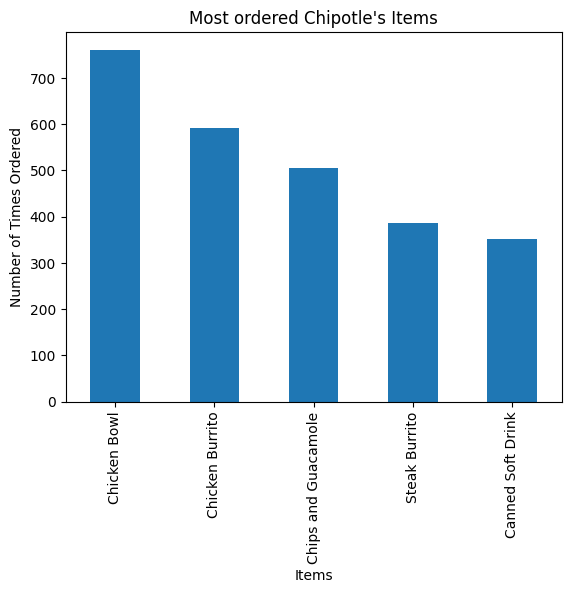

In [6]:
item_counts = chipo.groupby("item_name")["quantity"].sum()
item_counts = item_counts.sort_values(ascending = False).head(5)
item_counts.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5, 1.0, 'Number of items ordered per order price')

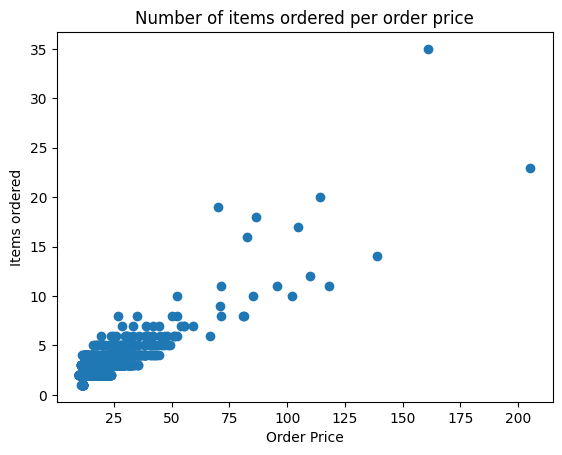

In [5]:
chipo["item_price"] = [float(value[1:-1]) for value in chipo["item_price"]] # strip the dollar sign and trailing space
orders = chipo.groupby('order_id').sum()
plt.scatter(x = orders["item_price"], y = orders["quantity"])
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

Q7: For each item_name find the min, max and median price and plot it with box plot

                                item_name   min    max  median
0                       6 Pack Soft Drink  6.49  12.98    6.49
1                           Barbacoa Bowl  8.69  11.75    9.25
2                        Barbacoa Burrito  8.69  11.75    9.25
3                   Barbacoa Crispy Tacos  8.99  18.50    9.25
4                     Barbacoa Salad Bowl  9.39  11.89   10.64
5                     Barbacoa Soft Tacos  8.99  11.75    9.25
6                           Bottled Water  1.09  15.00    1.50
7                                    Bowl  7.40  22.20   14.80
8                                 Burrito  7.40   7.40    7.40
9                             Canned Soda  1.09   4.36    1.09
10                      Canned Soft Drink  1.25   5.00    1.25
11                          Carnitas Bowl  8.99  35.25    9.25
12                       Carnitas Burrito  8.69  18.50    9.25
13                  Carnitas Crispy Tacos  8.99  17.98    9.25
14                         Carnitas Salad  8.99   8.99 

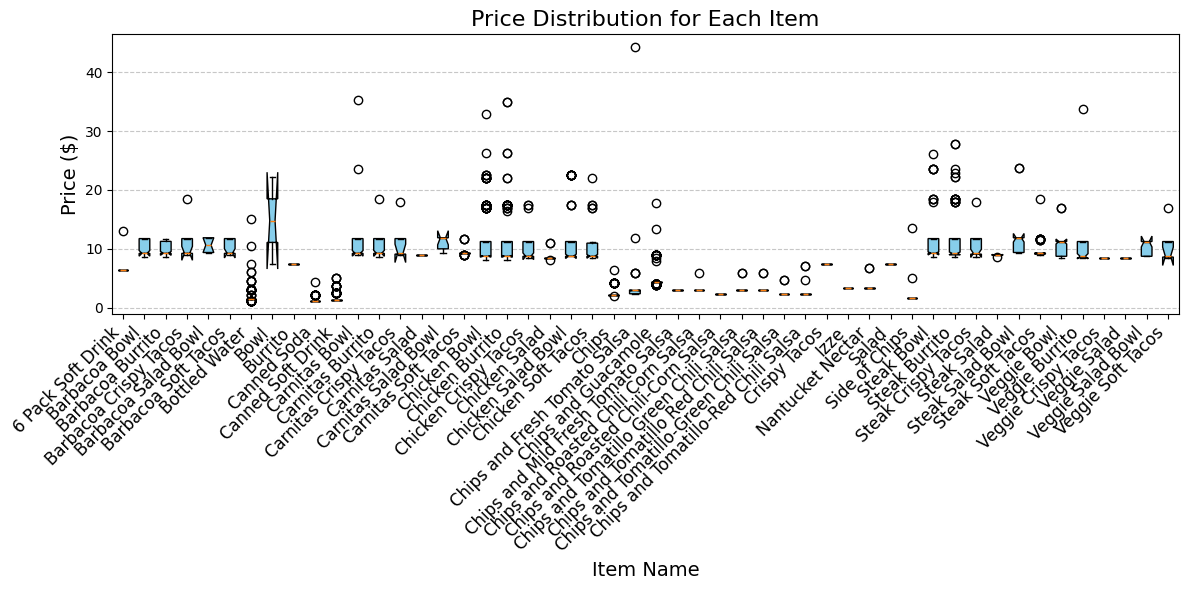

In [9]:
item_price = chipo.groupby("item_name")["item_price"].agg(["min", "max", "median"]).reset_index()
print(item_price)
box_plot_data = [chipo[chipo["item_name"] == item]["item_price"] for item in item_price["item_name"]]
plt.figure(figsize=(12, 6))
plt.boxplot(box_plot_data, labels=item_price["item_name"], patch_artist=True, notch=True, boxprops=dict(facecolor="skyblue", color="black"))
plt.title("Price Distribution for Each Item", fontsize=16)
plt.xlabel("Item Name", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
